<a href="https://colab.research.google.com/github/HarshalPawar88/Global-Terrorism-Analysis/blob/main/CH_%7BHarshal_Pawar%7D_%7BGlobal_Terrorism_Analysis%7D_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option("display.max_columns", None)
import seaborn as sns
from scipy.stats import mode

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
file_path = '/content/drive/MyDrive/Alma Better/Module-1. Python for Data Science/Week_4_Capstone_Project/Copy of Global Terrorism Data.csv'
df=pd.read_csv(file_path, encoding='ISO-8859-1' )

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# checking the column names
df[df.country_txt=='India'].head(3)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1186,197202220004,1972,2,22,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,4,Hijacking,NaN,NaN,NaN,NaN,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Palestinians,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosives,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,1.0,5000000.0,NaN,NaN,NaN,NaN,2.0,Hostage(s) released by perpetrators,187.0,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2764,197501190004,1975,1,2,NaN,0,NaN,92,India,6,South Asia,Bihar,Samastipur,25.863042,85.781004,1.0,0,The attack occurred in the town,"1/2/1975: The Indian Railway Minister, Lalit N...",1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,2,Government (General),18.0,"Government Personnel (excluding police, military)",Railway Minister of India and legislator,Lalit Narayan Mishra and a legislator,92.0,India,3.0,Police,25.0,Police Security Forces/Officers,Guards,2 Guards,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ananda Marga,NaN,NaN,NaN,NaN,NaN,Unknown,1.0,NaN,NaN,0,-99.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No additional information available.,4.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The case is very unclear and there are many ru...,"""Leaders of India Irate at Killing: Death of A...","Dhananjay Mahapatra, ""SC: Why has LN Mishra mu...",NaN,UMD Encyclopedia of World Terrorism 2012,0,0,0,0,NaN
3857,197605260001,1976,5,26,NaN,0,NaN,92,India,6,South Asia,Delhi,New Delhi,28.585836,77.153336,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,6,Airports & Aircraft,44.0,Airport,NaN,New Delhi airport,92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,0.0,NaN,NaN,0.0,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,0,-9,NaN


In [9]:
# checking the size
df.shape

(181691, 135)

In [10]:
df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [13]:
# filtering out the columns we need
sub_df = df[['eventid','iyear','imonth','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','nkill','weapdetail','nwound','gname','provstate']].copy()

In [14]:
#renaming the columns
sub_df.rename(columns = {'imonth':'month','eventid':'id','iyear':'year','country_txt':'country','region_txt':'region','attacktype1_txt':'attack_type','targtype1_txt':'target_type','nkill':'total_kills','nwound':'total_wounds','gname':'terrorist_group'},inplace=True)

In [15]:
sub_df.head(3)

,id,year,month,country,region,city,attack_type,target_type,total_kills,weapdetail,total_wounds,terrorist_group,provstate
0,197000000001,1970,7,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,1.0,NaN,0.0,MANO-D,NaN
1,197000000002,1970,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,NaN,0.0,23rd of September Communist League,Federal
2,197001000001,1970,1,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,1.0,NaN,0.0,Unknown,Tarlac


In [16]:
#checking the data type of the columns
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181691 non-null  int64  
 1   year             181691 non-null  int64  
 2   month            181691 non-null  int64  
 3   country          181691 non-null  object 
 4   region           181691 non-null  object 
 5   city             181257 non-null  object 
 6   attack_type      181691 non-null  object 
 7   target_type      181691 non-null  object 
 8   total_kills      171378 non-null  float64
 9   weapdetail       114021 non-null  object 
 10  total_wounds     165380 non-null  float64
 11  terrorist_group  181691 non-null  object 
 12  provstate        181270 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 18.0+ MB


In [17]:
# checking if there are any null values
sub_df['year'].isna().sum()

0

## **1. Yearwise Attack.**

In [18]:
attacks_per_year=sub_df.groupby('year').agg({'year':'count'}).rename(columns={'year':'no_of_attacks'})

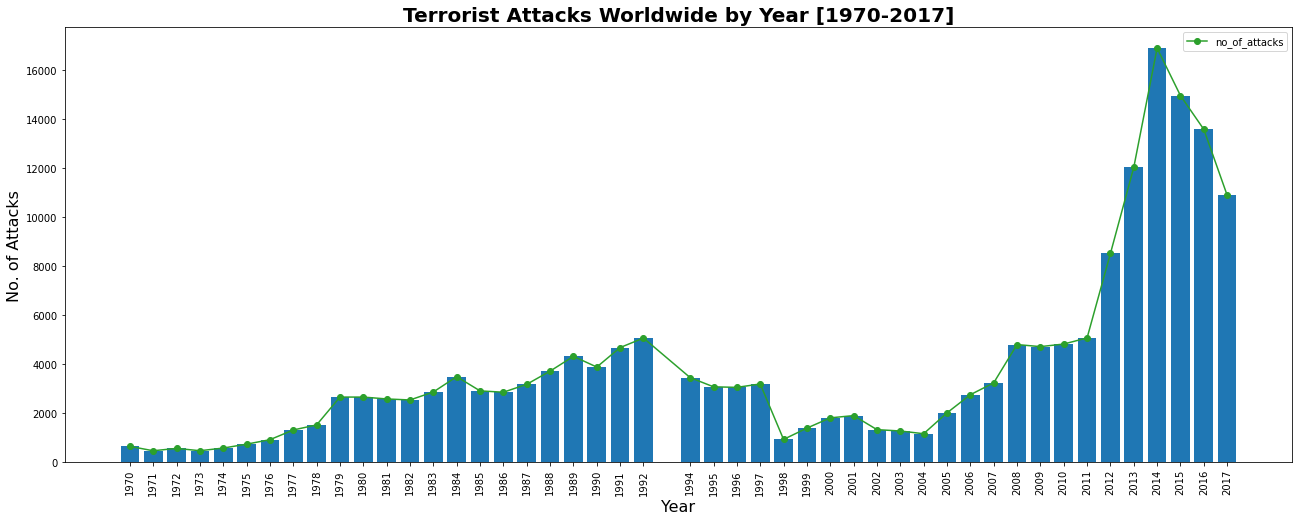

In [21]:
plt.rcParams['figure.figsize'] = (22, 8)
attacks_per_year.plot(zorder=5,color='C2', marker='o')
plt.bar(attacks_per_year.index,attacks_per_year.no_of_attacks)
plt.title('Terrorist Attacks Worldwide by Year [1970-2017]',fontsize=20,fontweight='bold')
plt.xlabel('Year',fontsize=16)
plt.ylabel('No. of Attacks',fontsize=16)
plt.xticks( attacks_per_year.index,rotation=90)
plt.show()


### The top five years with the most number of terrorist attacks.

In [22]:
attacks_per_year.nlargest(5,'no_of_attacks')

,no_of_attacks
year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900


# **2. Countrywise Attacks**

In [23]:
country_df=sub_df[['country','total_kills','terrorist_group']].copy()
country_wise=country_df.groupby('country').agg({'country':'count'}).rename(columns={'country':'total_attacks'}).nlargest(10,'total_attacks').reset_index().sort_values('total_attacks',ascending=False)

In [25]:
country_wise

,country,total_attacks
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


Text(0, 0.5, 'Country')

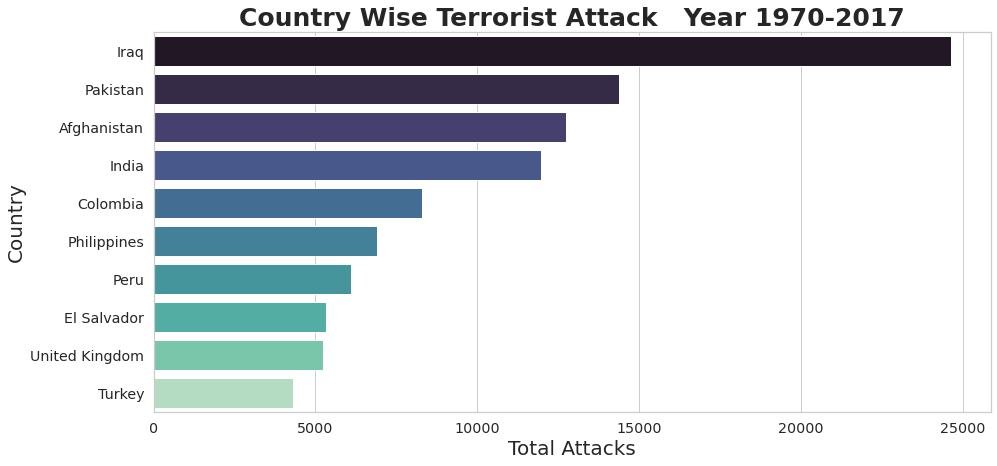

In [26]:
# Initialize the matplotlib figure
plt.rcParams['figure.figsize']=(15,7)
sns.set(font_scale=1.3)
sns.set_style("whitegrid")
l=sns.barplot(x='total_attacks',y='country',data=country_wise,palette='mako')
l.set_title("Country Wise Terrorist Attack   Year 1970-2017",fontsize=25,fontweight='bold')
l.set_xlabel('Total Attacks',fontsize=20)
l.set_ylabel('Country',fontsize=20)



# **3. Regionwise Attacks**

In [33]:
sub_df[sub_df['total_kills'].isna()]['total_kills'].sum()

0.0

In [34]:
region_attacks=sub_df[['id','region']]

In [35]:
region_wise=region_attacks.groupby('region').agg({'id':'count'}).rename(columns={'id':'total_attacks'}).reset_index().sort_values('total_attacks',ascending=False)

Text(0, 0.5, 'Region')

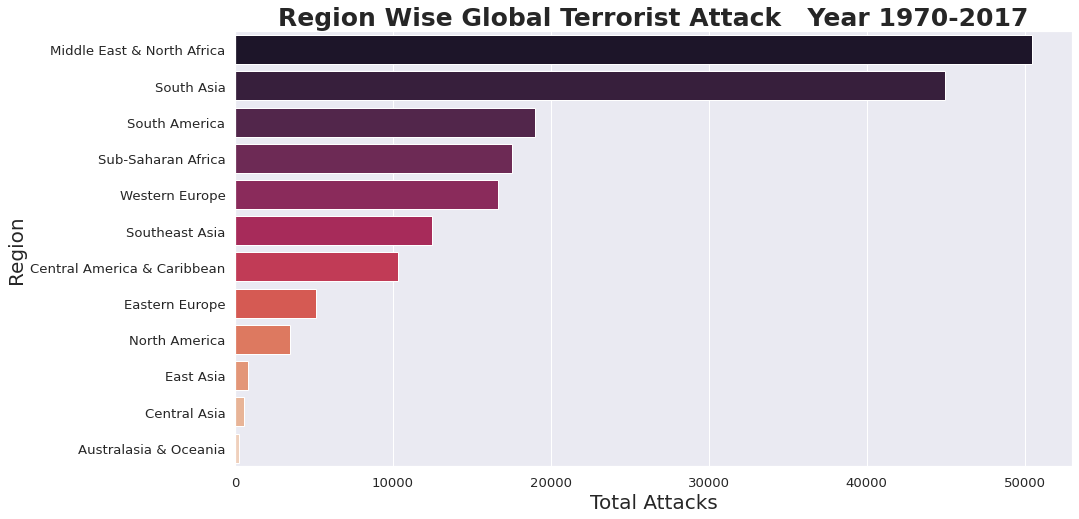

In [36]:
plt.rcParams['figure.figsize']=(15,8)
sns.set_style("whitegrid")
sns.set(font_scale=1.2)
f=sns.barplot(x='total_attacks',y='region',data=region_wise,palette='rocket')
f.set_title("Region Wise Global Terrorist Attack   Year 1970-2017",fontsize=25,fontweight='bold')
f.set_xlabel('Total Attacks',fontsize=20)
f.set_ylabel('Region',fontsize=20)


In [31]:
country_kills=sub_df[['country','total_kills']].copy()
country_wise_kills=country_df.groupby('country').agg({'country':'count','total_kills':'sum'}).rename(columns={'country':'total_attacks'}).nlargest(10,'total_attacks').reset_index().sort_values('total_attacks',ascending=False)

In [32]:
country_wise_kills

,country,total_attacks,total_kills
0,Iraq,24636,78589.0
1,Pakistan,14368,23822.0
2,Afghanistan,12731,39384.0
3,India,11960,19341.0
4,Colombia,8306,14698.0
5,Philippines,6908,9559.0
6,Peru,6096,12771.0
7,El Salvador,5320,12053.0
8,United Kingdom,5235,3410.0
9,Turkey,4292,6888.0
